# <center> <u> Feed Forward Neural Network </u> </center>

## <u> Feed Forward Network for Classification </u> 

## <center> $ L(\theta) = -\frac{1}{N} \sum_{i = 1}^{N} [\hat{y} \cdot \log(y) + (1 - \hat{y}) \cdot \log(1 - y)] $ </center> 

## <u> Feed Forward Network for Regression </u> 

## <center> $ L(\theta) = \frac{1}{N} \sum_{i = 1}^{N} (y - \hat{y})^{2} $ </center> 

In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
sns.set_theme(
    context = "notebook",
    style = "darkgrid", 
    palette = "bright",
)

sns.set(rc = {'figure.figsize':(12, 6)})

In [3]:
N = 100
x = np.linspace(-6, 6, N)

In [4]:
def tanh(x):
    return np.tanh(x)

def d_tanh(x):
    return 1 - np.square(np.tanh(x))

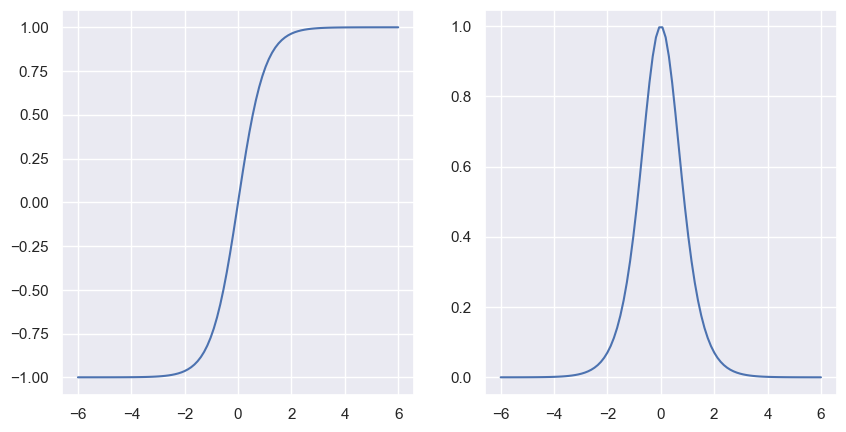

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

ax1.plot(x, tanh(x))
ax2.plot(x, d_tanh(x))

plt.show()

In [6]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def d_sigmoid(x):
    return (1 - sigmoid(x)) * sigmoid(x)

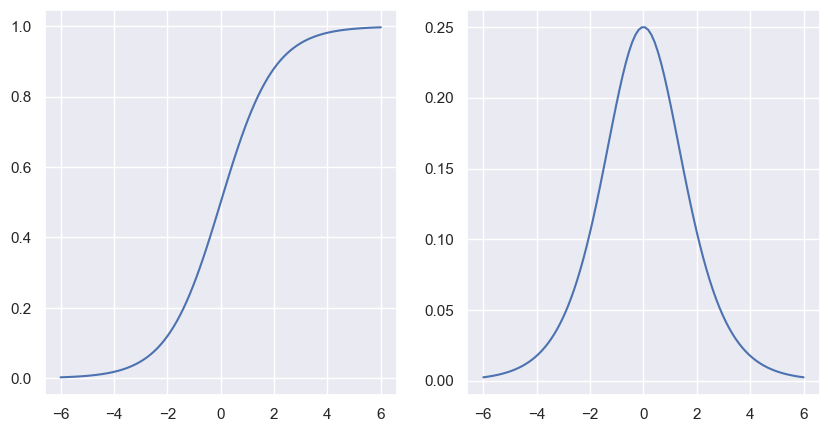

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

ax1.plot(x, sigmoid(x))
ax2.plot(x, d_sigmoid(x))

plt.show()

In [8]:
def linear(x):
    return x

def d_linear(x):
    return np.ones(x.shape)

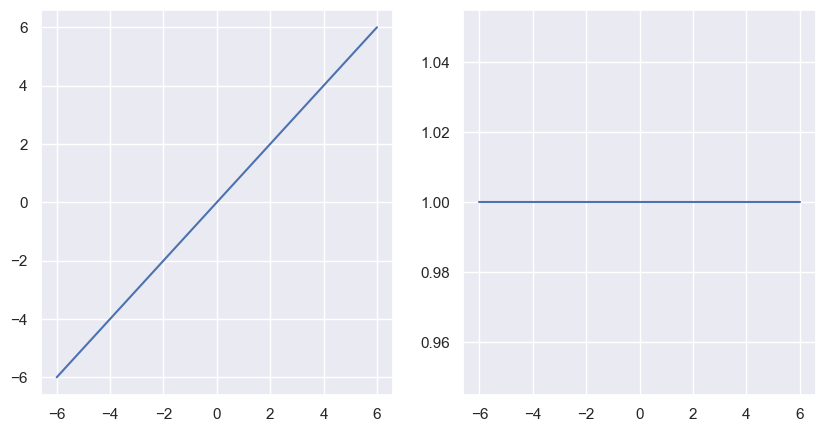

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

ax1.plot(x, linear(x))
ax2.plot(x, d_linear(x))

plt.show()

In [10]:
def squared_loss(y, a):
    return (a - y)**2

def d_squared_loss(y, a):
    return (a - y)

In [11]:
def logloss(y, a):
    return -(y * np.log(a) + (1 - y) * np.log(1 - a))

def d_logloss(y, a):
    return (a - y) / (a * (1 - a))

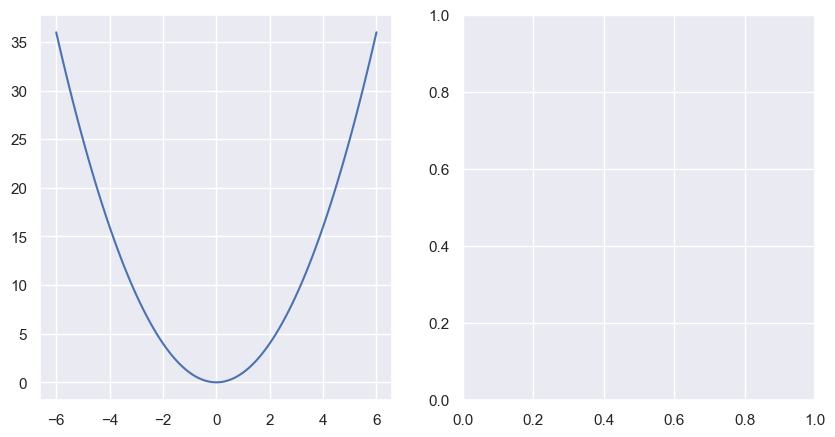

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

fx = (x**2)

ax1.plot(x, fx)

plt.show()

In [13]:
class Layer:

    activationFunctions = {
        'tanh': (tanh, d_tanh),
        'sigmoid': (sigmoid, d_sigmoid),
        'linear': (linear, d_linear)
    }
    
    learning_rate = 0.1
    
    def __init__(self, inputs, neurons, activation):
        self.W = np.random.randn(neurons, inputs)
        self.b = np.zeros((neurons, 1))
        self.act, self.d_act = self.activationFunctions.get(activation)
        
    def feedforward(self, A_prev):
        self.A_prev = A_prev
        self.Z = np.dot(self.W, self.A_prev) + self.b
        self.A = self.act(self.Z)
        return self.A
    
    def backprop(self, dA):
        dZ = np.multiply(self.d_act(self.Z), dA)
        dW = 1/dZ.shape[1] * np.dot(dZ, self.A_prev.T)
        db = 1/dZ.shape[1] * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(self.W.T, dZ)

        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return dA_prev

## <center> Feed Forward Classifier </center> 

In [14]:
x_train = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # dim x m
print(x_train.shape)

y_train = np.array([[0, 1, 1, 0]]) # 1 x m
print(y_train.shape)

(2, 4)
(1, 4)


In [15]:
m = 4
epochs = 1500

layers = [Layer(2, 3, 'tanh'), Layer(3, 1, 'sigmoid')]
costs = [] 

for epoch in range(epochs):
    A = x_train
    for layer in layers:
        A = layer.feedforward(A)

    cost = 1/m * np.sum(logloss(y_train, A))
    costs.append(cost)

    dA = d_logloss(y_train, A)
    for layer in reversed(layers):
        dA = layer.backprop(dA)


# Making predictions
A = x_train
for layer in layers:
    A = layer.feedforward(A)
print(A)

[[0.01001643 0.96021822 0.96554466 0.05166237]]


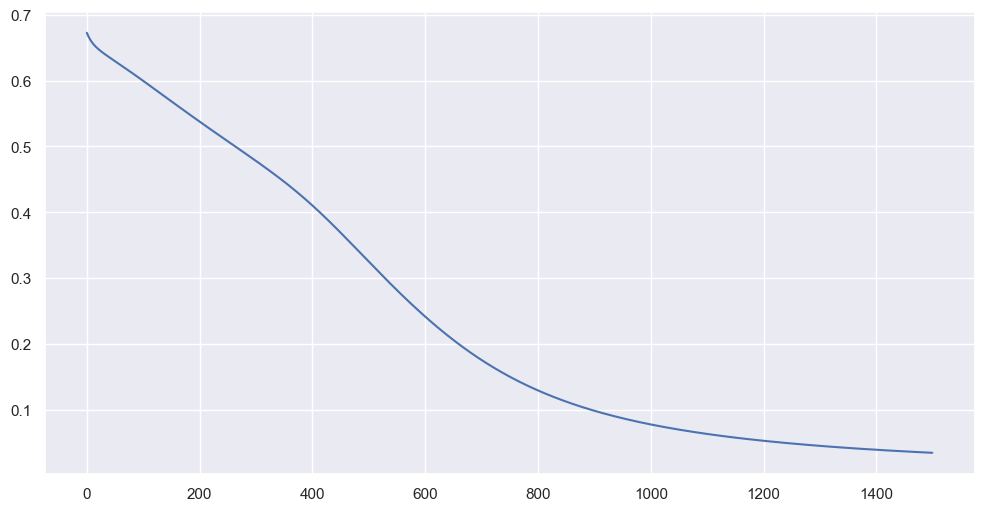

In [16]:
plt.plot(range(epochs), costs)

## <center> Feed Forward Regressor </center> 

In [17]:
X = np.array([np.sin(2 * x)])
print(X.shape)

y = np.array([np.sin(2 * x)])
print(y.shape)

(1, 100)
(1, 100)


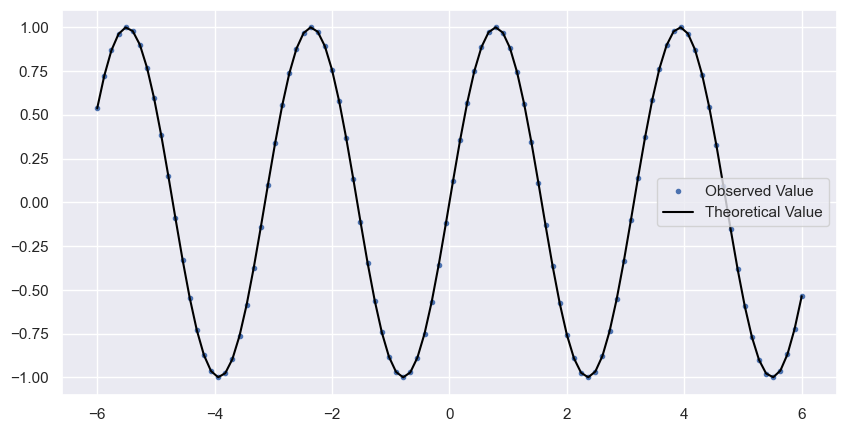

In [18]:
plt.figure(figsize = (10, 5))

plt.scatter(x, X[0], marker = ".", label = "Observed Value")

plt.plot(x, y[0], color = "black", label = "Theoretical Value")

plt.legend(loc = "best")
plt.show()

In [19]:
m = 4
epochs = 50
df = pd.DataFrame()

# inputs, neurons, function
layers = [Layer(1, 2, 'linear'), Layer(2, 1, 'linear')]
costs = [] 

for epoch in range(epochs):
    A = X
    for layer in layers:
        A = layer.feedforward(A)

    cost = 1/m * np.sum(squared_loss(y, A))
    costs.append(cost)

    dA = d_squared_loss(y, A)
    for layer in reversed(layers):
        dA = layer.backprop(dA)

    # Making predictions
    A = X
    for layer in layers:
        A = layer.feedforward(A)
        
    df[str(epoch)] = A[0]

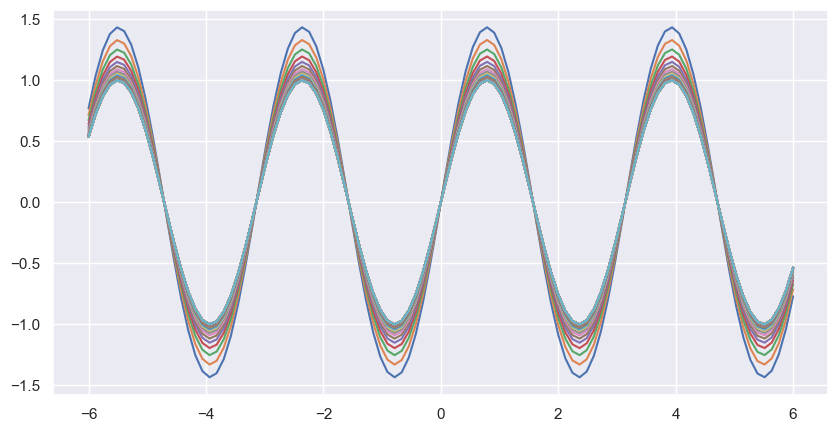

In [20]:
plt.figure(figsize = (10, 5))

plt.plot(x, df)

plt.show()

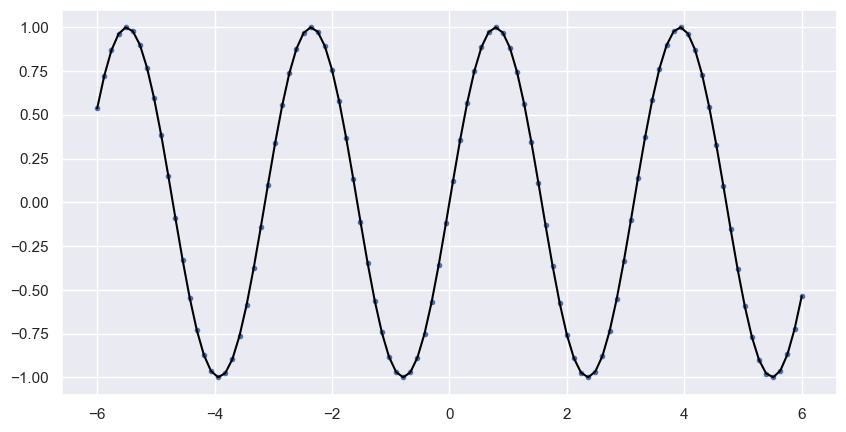

In [21]:
plt.figure(figsize = (10, 5))

plt.scatter(x, A[0], marker = ".", label = "Predicted Values")
plt.plot(x, y[0], color = "black", label = "True Values")

plt.show()

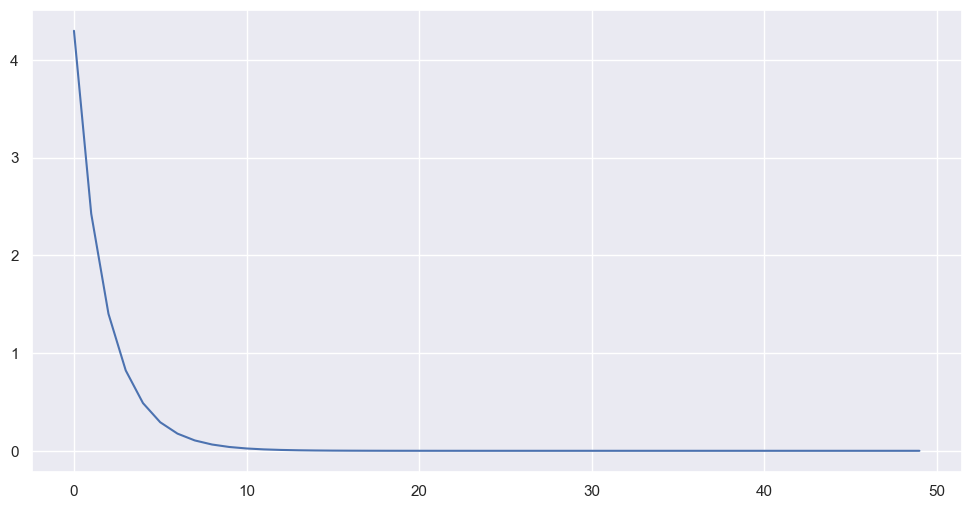

In [22]:
plt.plot(range(epochs), costs)